# Data Exploration

In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

In [364]:
data = pd.read_csv("housing_data.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [365]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### total_bedrooms has a few null entries, so it's fine to drop those data points

In [366]:
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


### Trying to predict median_house_value so separate the data accordingly

In [367]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [368]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)
training_data = x_train.join(y_train)
training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17298,-119.51,34.40,24.0,3422.0,596.0,1763.0,601.0,5.2039,NEAR OCEAN,301300.0
535,-122.27,37.78,13.0,2020.0,535.0,959.0,486.0,5.2601,NEAR BAY,292700.0
16488,-121.19,38.13,27.0,2400.0,435.0,1085.0,444.0,3.7687,INLAND,165200.0
4662,-118.30,34.05,42.0,1476.0,610.0,1605.0,545.0,1.7210,<1H OCEAN,214300.0
20256,-119.17,34.21,33.0,1039.0,256.0,1432.0,272.0,3.1103,NEAR OCEAN,143500.0
...,...,...,...,...,...,...,...,...,...,...
8036,-118.14,33.84,44.0,3043.0,619.0,1316.0,607.0,4.4286,<1H OCEAN,254900.0
13802,-117.61,34.34,18.0,5210.0,912.0,1301.0,464.0,4.8623,INLAND,176900.0
20330,-119.03,34.25,25.0,3344.0,502.0,1483.0,496.0,6.1960,<1H OCEAN,340600.0
10649,-117.79,33.55,39.0,5066.0,1292.0,1915.0,1117.0,3.8210,<1H OCEAN,452100.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

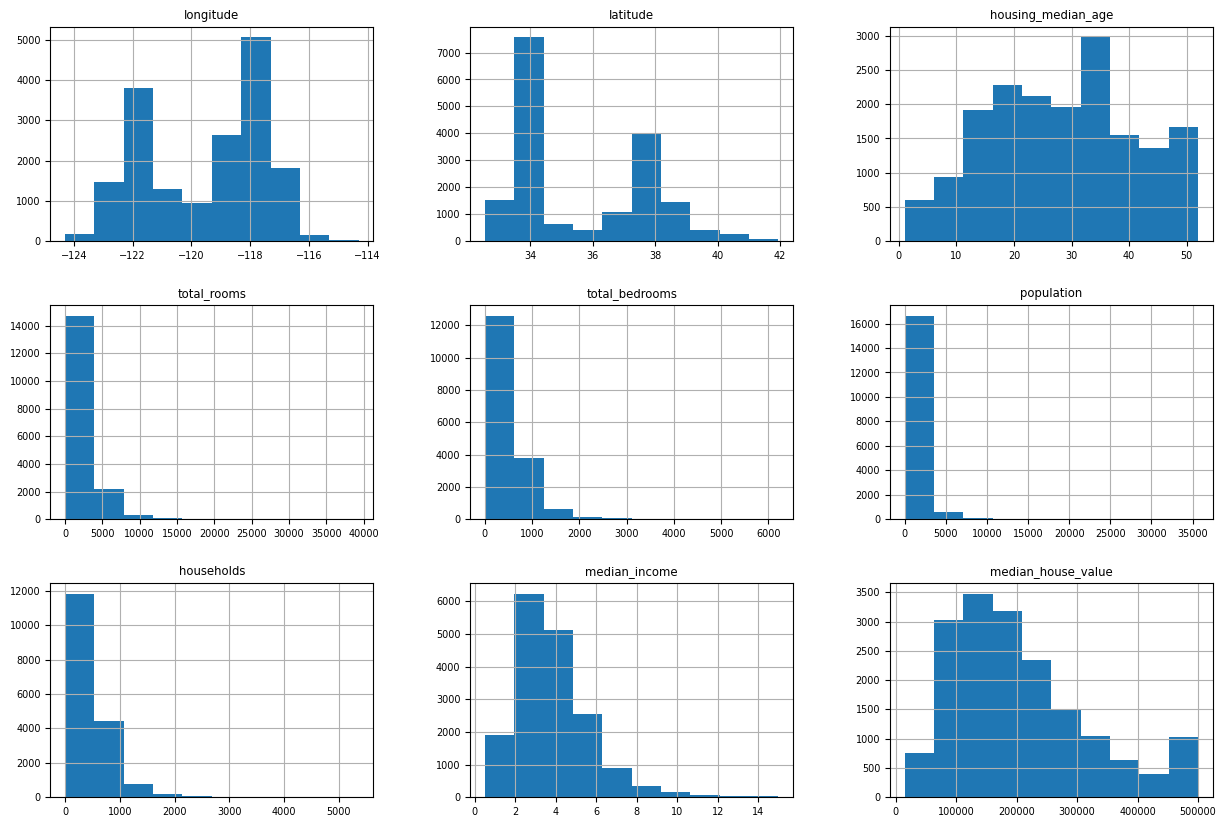

In [369]:
training_data.hist(figsize = (15,10))

In [370]:
correlation = training_data.corr(numeric_only = True)
correlation

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925006,-0.109049,0.044335,0.068305,0.102265,0.055607,-0.013186,-0.047073
latitude,-0.925006,1.000000,0.011029,-0.034905,-0.065420,-0.111195,-0.070450,-0.080710,-0.141753
housing_median_age,-0.109049,0.011029,1.000000,-0.360278,-0.318936,-0.296208,-0.301303,-0.124434,0.105012
total_rooms,0.044335,-0.034905,-0.360278,1.000000,0.930020,0.857955,0.918832,0.199990,0.131701
total_bedrooms,0.068305,-0.065420,-0.318936,0.930020,1.000000,0.880775,0.980395,-0.007392,0.046210
population,0.102265,-0.111195,-0.296208,0.857955,0.880775,1.000000,0.909153,0.006844,-0.025222
households,0.055607,-0.070450,-0.301303,0.918832,0.980395,0.909153,1.000000,0.013091,0.061522
median_income,-0.013186,-0.080710,-0.124434,0.199990,-0.007392,0.006844,0.013091,1.000000,0.686960
median_house_value,-0.047073,-0.141753,0.105012,0.131701,0.046210,-0.025222,0.061522,0.686960,1.000000


<Axes: >

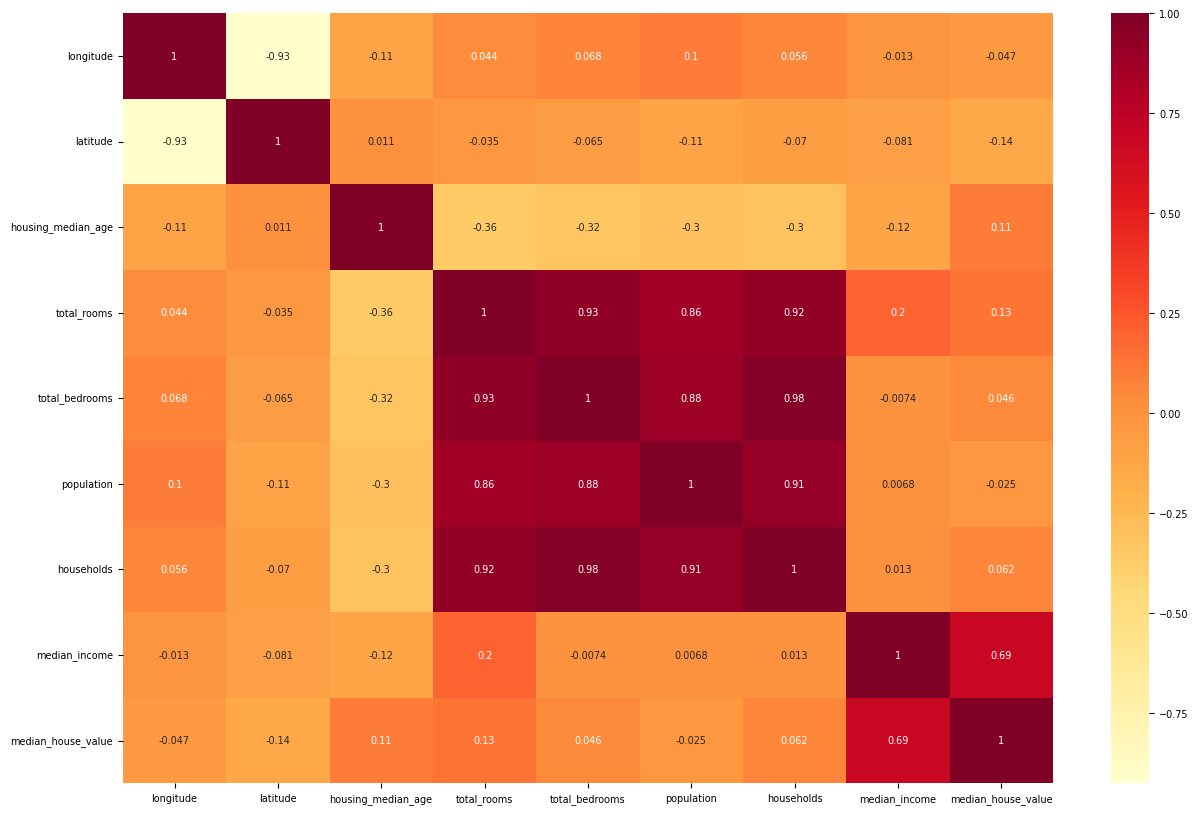

In [371]:
plt.figure(figsize = (15,10))
sea.heatmap(correlation, annot = True, cmap = "YlOrRd")

# Data Preprocessing / Feature Engineering

### Histograms show that total_rooms, total_bedrooms, population, and households have right-skewed shape. Can use log of data to get closer to bell curve shape

In [372]:
log_epsilon = 1e-32
training_data['total_rooms'] = np.log(training_data['total_rooms'] + log_epsilon)
training_data['total_bedrooms'] = np.log(training_data['total_bedrooms'] + log_epsilon)
training_data['population'] = np.log(training_data['population'] + log_epsilon)
training_data['households'] = np.log(training_data['households'] + log_epsilon)

### The histograms for those 4 features now have a shape closer to Gaussian bell curve. Hence, those features likely follow a log-normal distribution

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

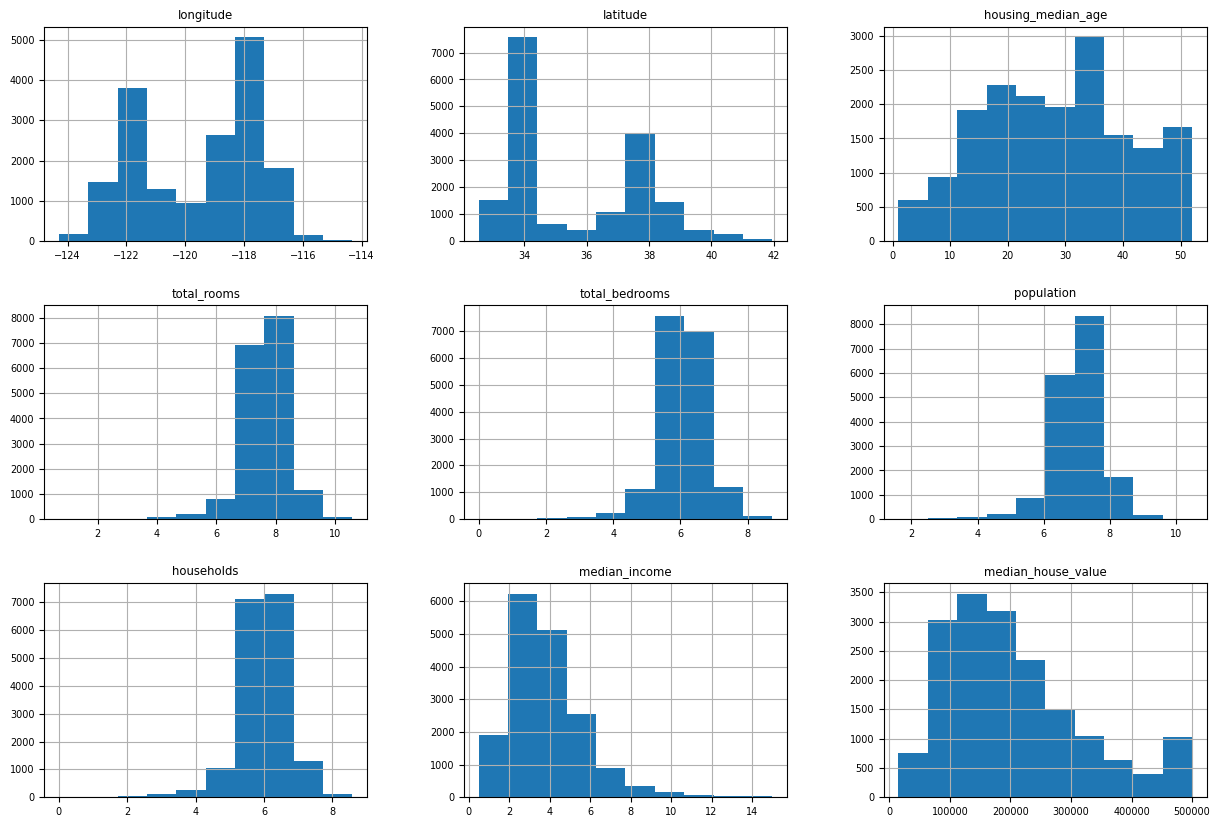

In [373]:
training_data.hist(figsize = (15,10))

### Scatterplot to visualize effect of ocean proximity on house prices - median house value can be higher when you are closer to the coast 

/Users/ufarooqui/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ufarooqui/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ufarooqui/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='latitude', ylabel='longitude'>

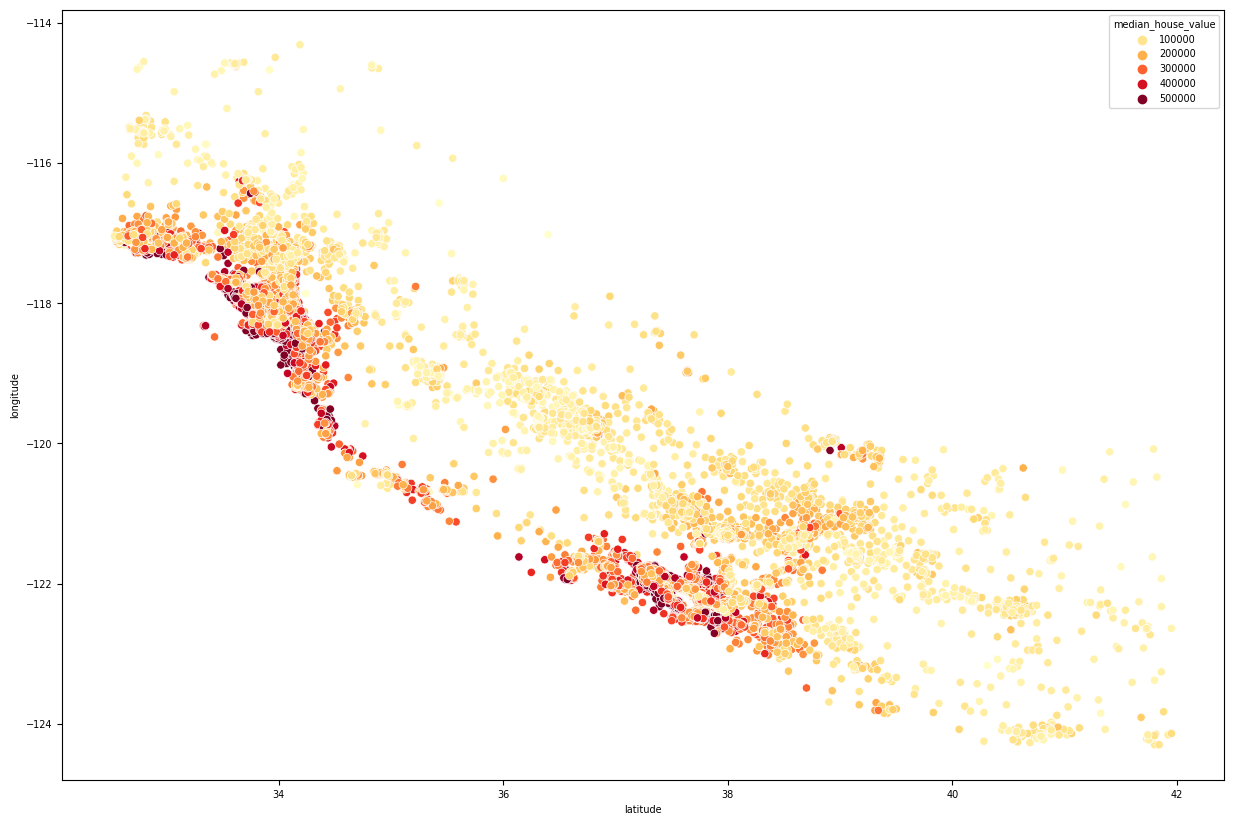

In [374]:
plt.figure(figsize = (15,10))
sea.scatterplot(x = "latitude", y = "longitude", data = training_data, hue = "median_house_value", palette = "YlOrRd")

### Utilize one-hot encoding for ocean_proximity feature since it may have an impact on median_house_value

In [375]:
training_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7680
INLAND        5517
NEAR OCEAN    2249
NEAR BAY      1918
ISLAND           4
Name: count, dtype: int64

In [376]:
training_data = training_data.join(pd.get_dummies(training_data.ocean_proximity, dtype = int)).drop(['ocean_proximity'], axis = 1)
training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17298,-119.51,34.40,24.0,8.137980,6.390241,7.474772,6.398595,5.2039,301300.0,0,0,0,0,1
535,-122.27,37.78,13.0,7.610853,6.282267,6.865891,6.186209,5.2601,292700.0,0,0,0,1,0
16488,-121.19,38.13,27.0,7.783224,6.075346,6.989335,6.095825,3.7687,165200.0,0,1,0,0,0
4662,-118.30,34.05,42.0,7.297091,6.413459,7.380879,6.300786,1.7210,214300.0,1,0,0,0,0
20256,-119.17,34.21,33.0,6.946014,5.545177,7.266827,5.605802,3.1103,143500.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8036,-118.14,33.84,44.0,8.020599,6.428105,7.182352,6.408529,4.4286,254900.0,1,0,0,0,0
13802,-117.61,34.34,18.0,8.558335,6.815640,7.170888,6.139885,4.8623,176900.0,0,1,0,0,0
20330,-119.03,34.25,25.0,8.114923,6.218600,7.301822,6.206576,6.1960,340600.0,1,0,0,0,0
10649,-117.79,33.55,39.0,8.530307,7.163947,7.557473,7.018402,3.8210,452100.0,1,0,0,0,0


### Generate new heatmap with one-hot encoding of ocean_proximity

<Axes: >

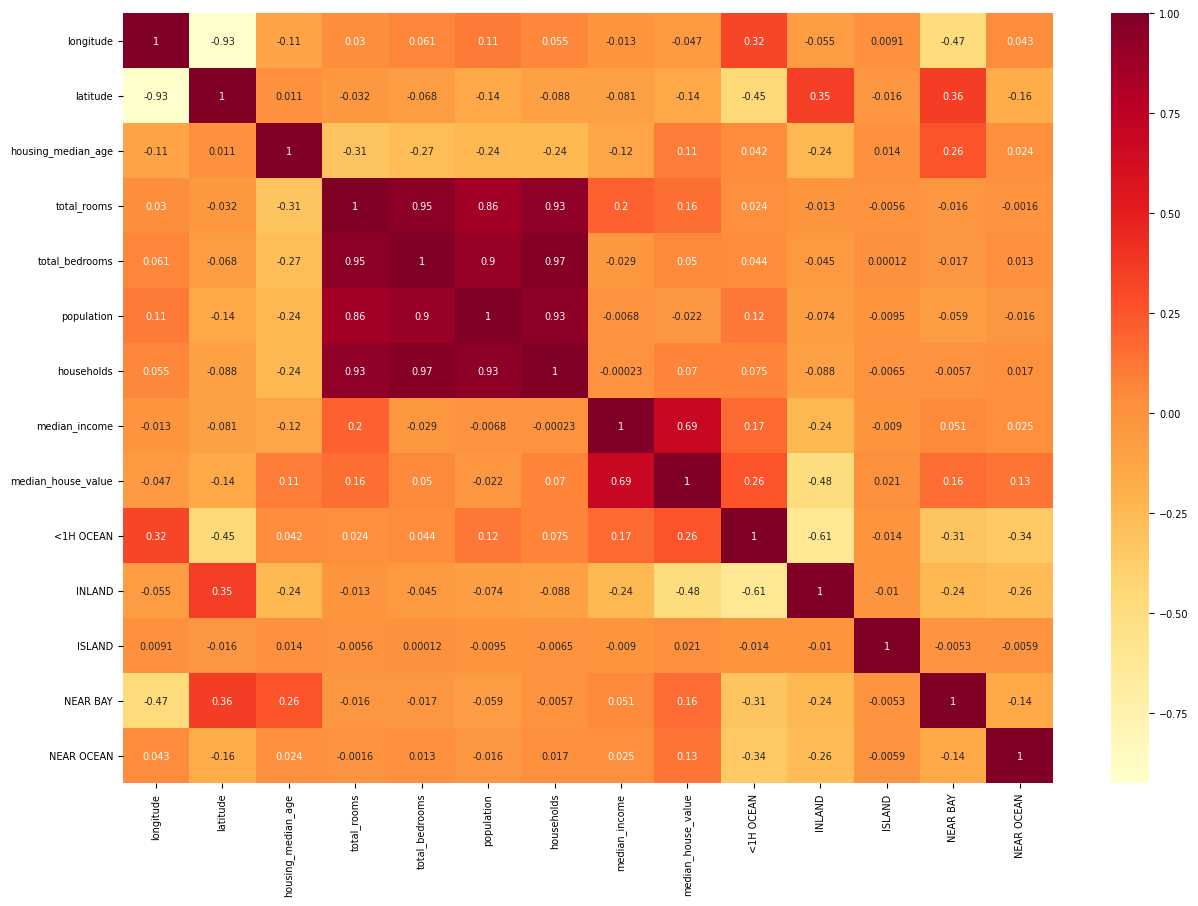

In [377]:
plt.figure(figsize = (15,10))
sea.heatmap(training_data.corr(), annot = True, cmap = "YlOrRd")

## Linear Regression Model

In [378]:
from sklearn.linear_model import LinearRegression

x_train, y_train = training_data.drop(['median_house_value'], axis = 1), training_data['median_house_value']
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

LinearRegression()

### Modify the test data accordingly

In [379]:
testing_data = x_test.join(y_test)
testing_data['total_rooms'] = np.log(testing_data['total_rooms'] + log_epsilon)
testing_data['total_bedrooms'] = np.log(testing_data['total_bedrooms'] + log_epsilon)
testing_data['population'] = np.log(testing_data['population'] + log_epsilon)
testing_data['households'] = np.log(testing_data['households'] + log_epsilon)
testing_data = testing_data.join(pd.get_dummies(testing_data.ocean_proximity, dtype = int)).drop(['ocean_proximity'], axis = 1)
x_test, y_test = testing_data.drop(['median_house_value'], axis = 1), testing_data['median_house_value']

### Metrics to analyze accuracy for linear model

In [380]:
from sklearn.metrics import mean_squared_error, r2_score

median_house_value_prediction = linear_regression.predict(x_test)
root_mean_squared_error = np.sqrt(mean_squared_error(y_test, median_house_value_prediction))
regression_score = r2_score(y_test, median_house_value_prediction)
data_points = np.arange(1, np.array(x_test).shape[0] + 1)
print("Root Mean Squared Error: ", root_mean_squared_error)
print("Coefficient of Determination Regression Score: ", regression_score)


Root Mean Squared Error:  66312.54128420183
Coefficient of Determination Regression Score:  0.6839843574053748
